In [1]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

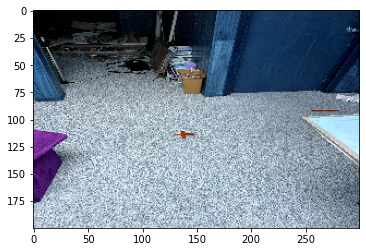

In [2]:
image_orig = cv2.imread("map.jpg")

image_mod = cv2.imread("kid.jpg")
resized_orig = cv2.resize(image_orig, (300, 200))    
resized_mod = cv2.resize(image_mod, (300, 200))
plt.imshow(resized_orig)

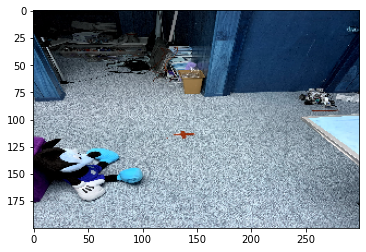

In [3]:
plt.imshow(resized_mod)

In [4]:
# convert the images to grayscale
gray_orig = cv2.cvtColor(resized_orig, cv2.COLOR_BGR2GRAY)
gray_mod = cv2.cvtColor(resized_mod, cv2.COLOR_BGR2GRAY)
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(gray_orig, gray_mod, full=True)

diff = (diff * 255).astype("uint8")

print("Structural Similarity Index: {}".format(score))

Structural Similarity Index: 0.809701163166516


<ipython-input-4-98eb7088c581>:6: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  (score, diff) = compare_ssim(gray_orig, gray_mod, full=True)


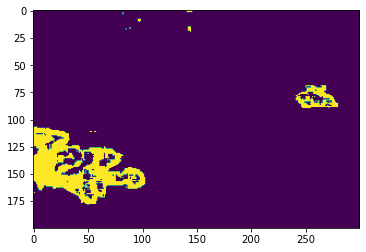

In [5]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 5,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
plt.imshow(thresh)

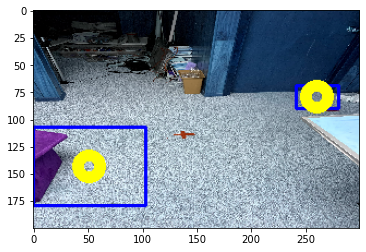

In [6]:
lst = []

# loop over the contours
for c in cnts:
# compute the bounding box of the contour and then draw the
# bounding box on both input images to represent where the two
# images differ
        (x, y, w, h) = cv2.boundingRect(c)
        if w>30 or h > 30:
            cv2.rectangle(resized_orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(resized_mod, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.circle(resized_orig, center=(x + int(w/2), y + int(h/2)), radius=10, color=(255,255,0), thickness=10)
            cv2.circle(resized_mod, center=(x + int(w/2), y + int(h/2)), radius=10, color=(255,255,0), thickness=10)
            rect = [x, y, w, h]
            lst.append(rect)
 
# show the output images
plt.imshow(resized_orig)


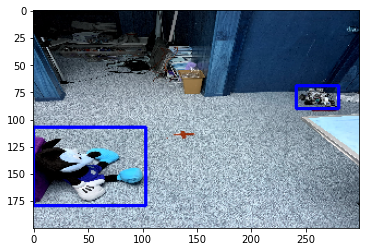

In [11]:
plt.imshow( resized_mod)


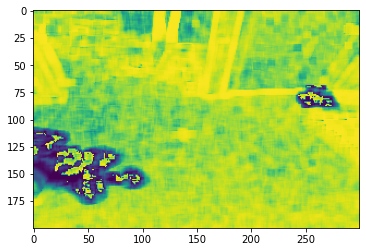

In [8]:
plt.imshow(diff)


In [18]:
lst

[[0, 107, 103, 72], [241, 69, 39, 21]]

In [23]:
xm = lst[0][0] +  lst[0][2] /2
xm2 = lst[1][0] +  lst[1][2] /2
if xm<xm2:
    xx = xm2-xm
else:
    xx= xm-xm2
print(xx);


xf = 10;
xmove = xx/xf;
print(xmove);



209.0
20.9


In [24]:
ym = lst[0][1] +  lst[0][3] /2
ym2 = lst[1][1] +  lst[1][3] /2
if ym<ym2:
    yy = ym2-ym
else:
    yy= ym-ym2
print(yy);


yf = 10;
ymove = yy/yf;
print(ymove);



63.5
6.35


In [25]:
print(str(xmove)+","+str(ymove))

20.9,6.35


In [9]:
x = "90,10,10"
mv = x.split(",")
print("rot"+str(mv[0]))

rot90


In [22]:
from flask import Flask
app = Flask(__name__)
a=0
@app.route('/')
def hello_world():
    if (a==0):  
        a=1
        return '90,10,10'
    else:
        a=0
        return '0,0,0'

app.run(host = '0.0.0.0',port=5005)

'0,0,0'